<a href="https://colab.research.google.com/github/T-Pavithra1311/projects/blob/master/internship_studio_mlproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1:**  Importing the datasets and libraries 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
from google.colab import files
details = files.upload()

Saving mldetails.csv to mldetails.csv


Checking the datatype, statistical summary, shape, null
values etc.


In [6]:
import io
data1 = pd.read_csv(io.BytesIO(details['mldetails.csv']),)

In [ ]:
data1.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
data1.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
data1.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
data1.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

The criteria which has to be seen to find the probability that a person will avail **personal loan**

● ID: Customer ID

● Age: Customer's age in completed years

● Experience: #years of professional experience

● Income: Annual income of the customer ($000)

● ZIP Code: Home Address ZIP code.

● Family: Family size of the customer

● CCAvg: Avg. spending on credit cards per month ($000)

● Education: Education Level. 1: Undergrad; 2: Graduate; 3:Advanced/Professional

● Mortgage: Value of house mortgage if any. ($000)

● Personal Loan: Did this customer accept the personal loan offered in the last campaign?

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit (CD) account with the bank?

● Online: Does the customer use internet banking facilities?

● Credit card: Does the customer use a credit card issued by the bank?



**Step 2:**  To Check if we need to clean the data for any of the variables

In [ ]:
a=data1['Experience']
b=data1['Age']
relation=a.corr(b)
relation

0.9942148569683321

In [7]:
data1=data1.drop(['Experience','Age',"ZIP Code"],axis=1)
data1.head()

,ID,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,49,4,1.6,1,0,0,1,0,0,0
1,2,34,3,1.5,1,0,0,1,0,0,0
2,3,11,1,1.0,1,0,0,0,0,0,0
3,4,100,1,2.7,2,0,0,0,0,0,0
4,5,45,4,1.0,2,0,0,0,0,0,1


In [8]:
data1=data1.drop(['ID'],axis=1)

**Step 3:** EDA: Studying the data distribution in each attribute and target variable


**Number of unique in each column?**

In [ ]:
Values = data1.nunique()
print('Unique values present in each column')
print(Values)

Unique values present in each column
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64


**Number of people with zero mortgage?**

In [ ]:
data1['Mortgage'].value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

**Number of people with zero credit card spending per month?**

In [ ]:
data1['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

**Value counts of all categorical columns**


In [ ]:
data1['Income'].value_counts()

44     85
38     84
81     83
41     82
39     81
       ..
189     2
202     2
205     2
224     1
218     1
Name: Income, Length: 162, dtype: int64

In [ ]:
data1['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
data1['CCAvg'].value_counts()

0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
2.75      1
8.20      1
9.30      1
3.67      1
5.33      1
Name: CCAvg, Length: 108, dtype: int64

In [ ]:
data1['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
data1['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [ ]:
data1['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
data1['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
data1['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

**Univariate and Bivariate analysis**

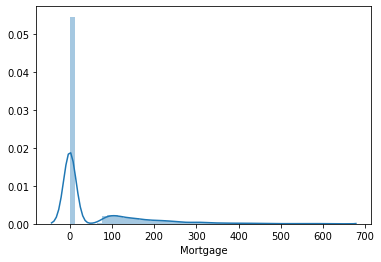

In [ ]:
sns.distplot(data1.Mortgage);

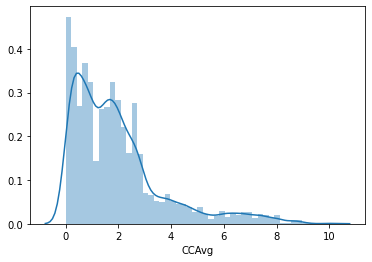

In [ ]:
sns.distplot(data1.CCAvg);

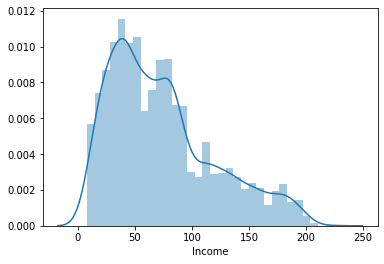

In [ ]:
sns.distplot(data1.Income);

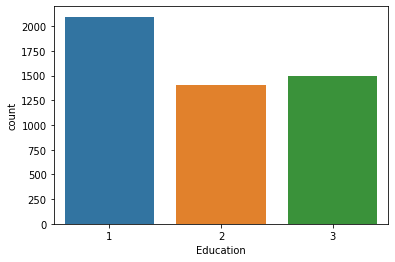

In [ ]:
sns.countplot(data1.Education);

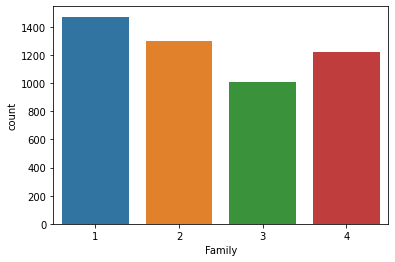

In [ ]:
sns.countplot(data1.Family);

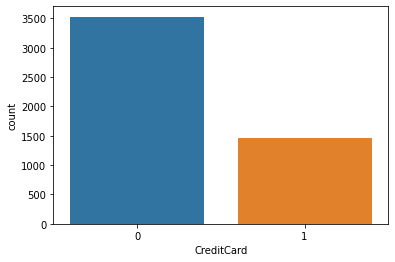

In [ ]:
sns.countplot(data1.CreditCard);

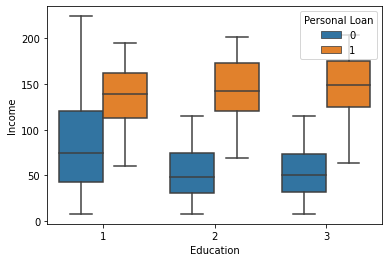

In [ ]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data1);

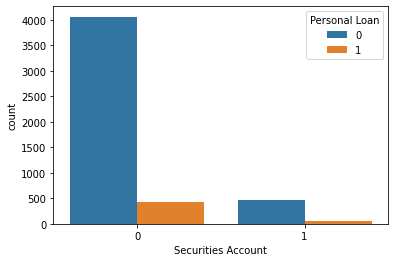

In [ ]:
sns.countplot(x='Securities Account',hue='Personal Loan',data=data1);

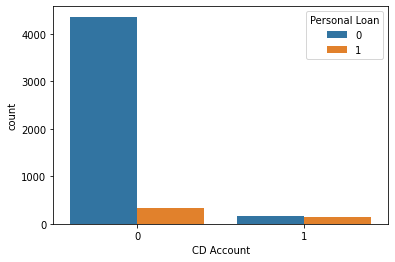

In [ ]:
sns.countplot(x='CD Account',hue='Personal Loan',data=data1);

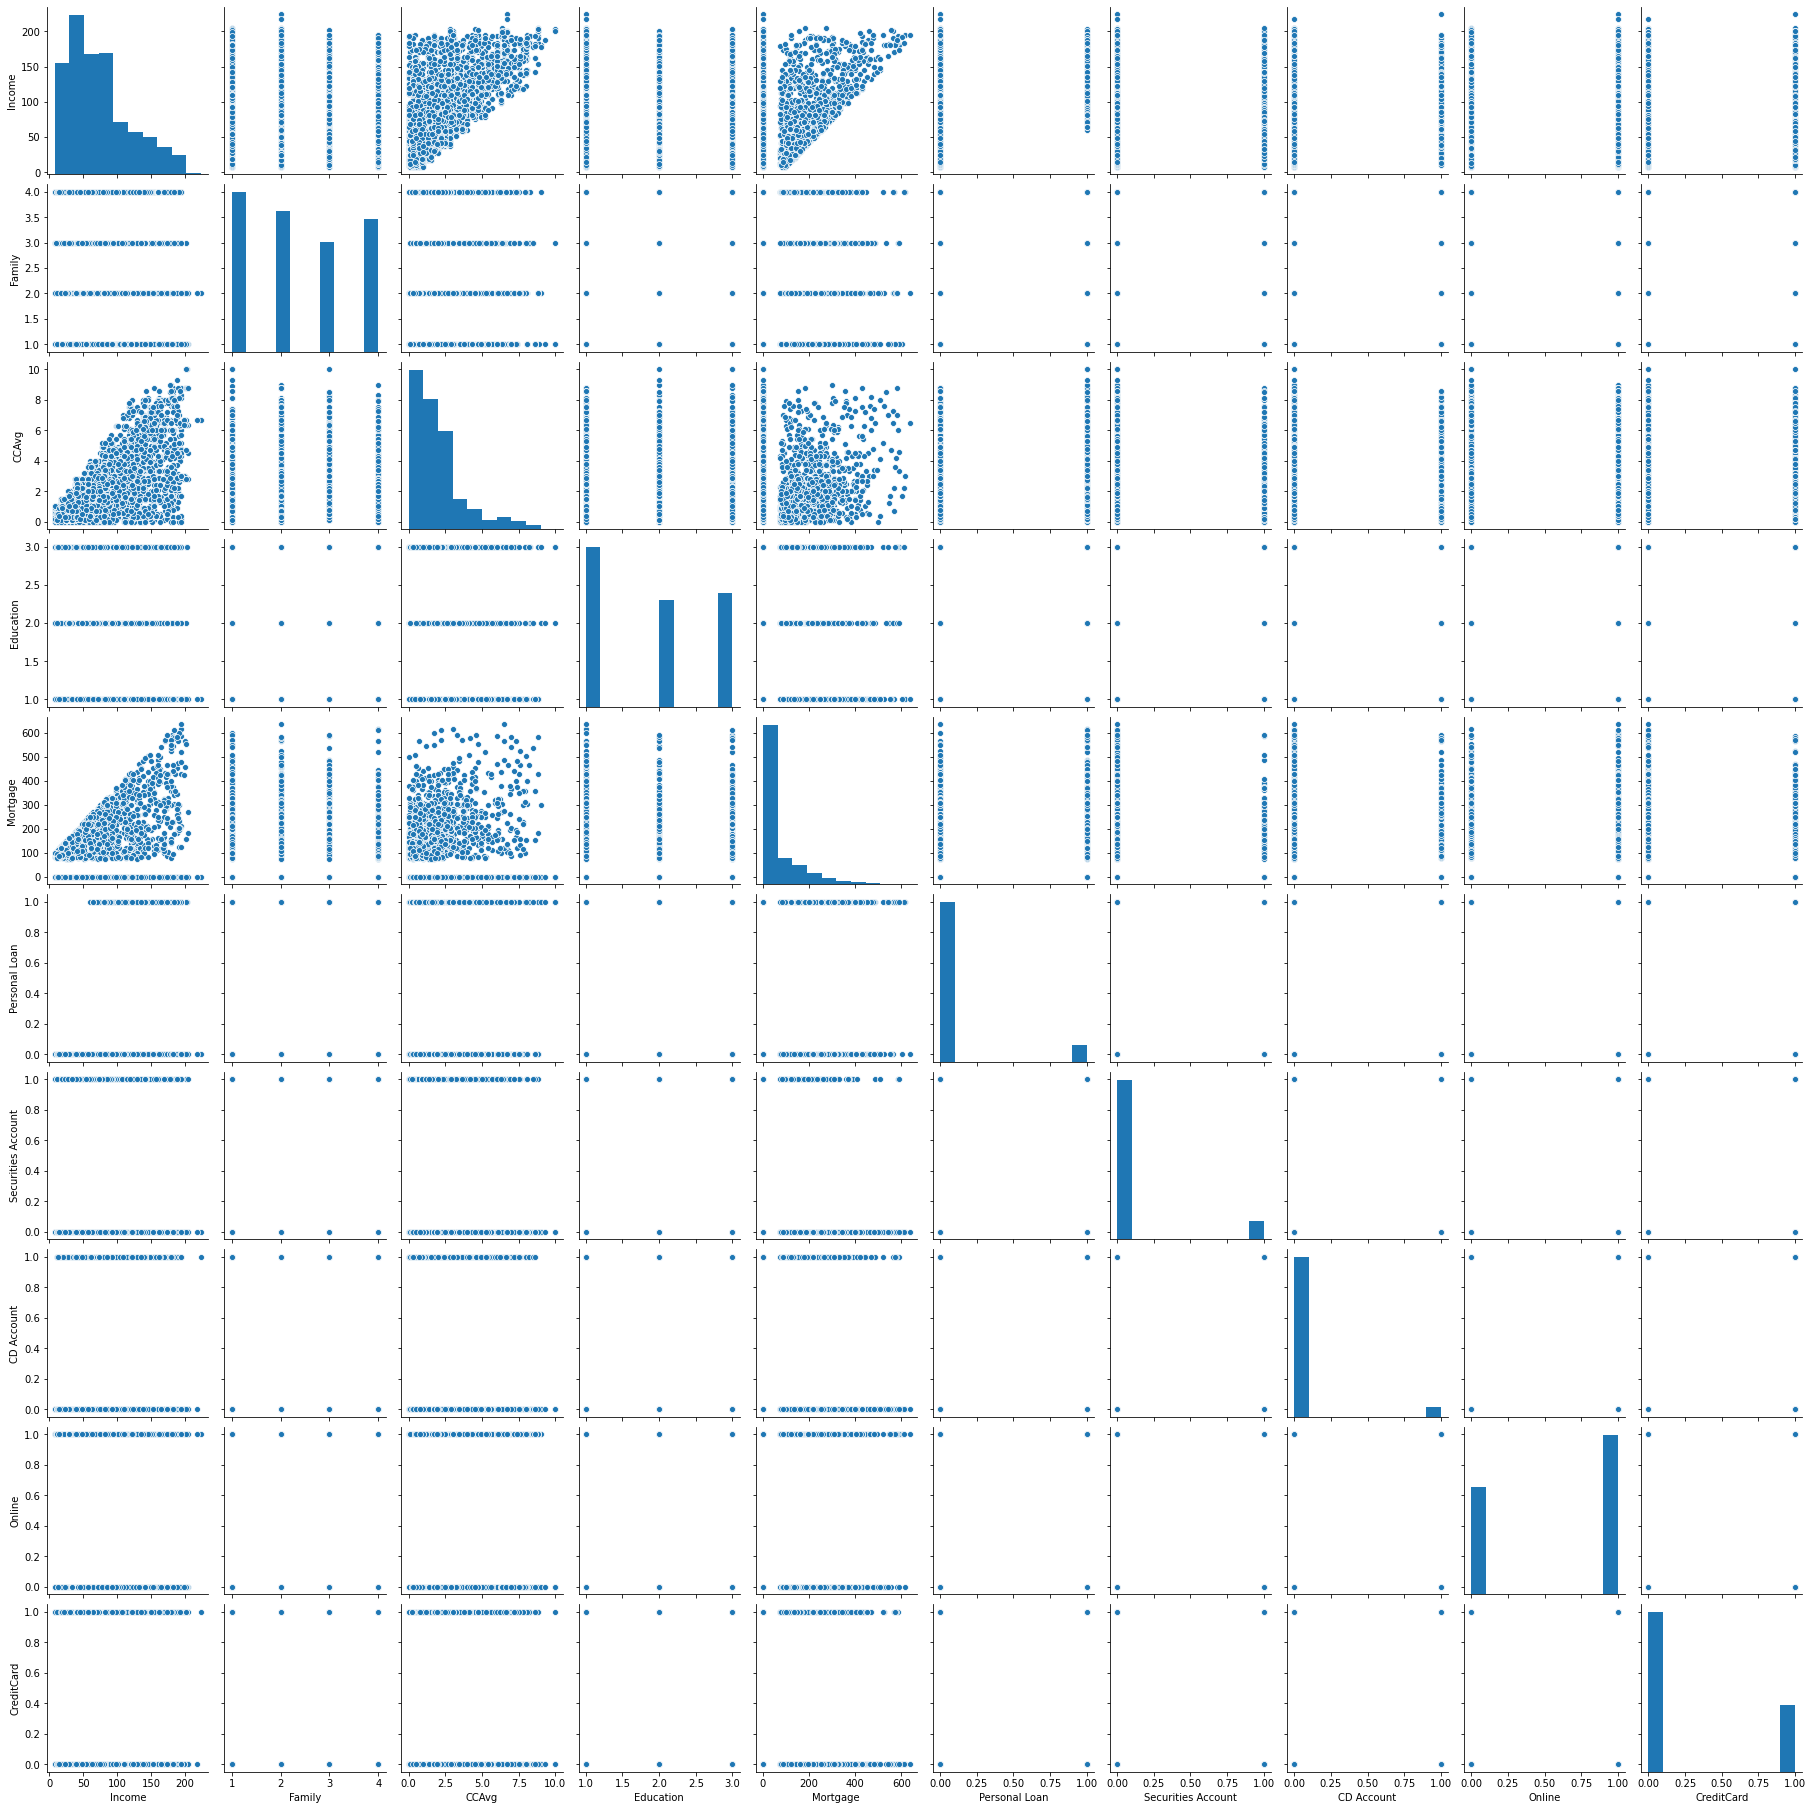

In [ ]:
sns.pairplot(data1)

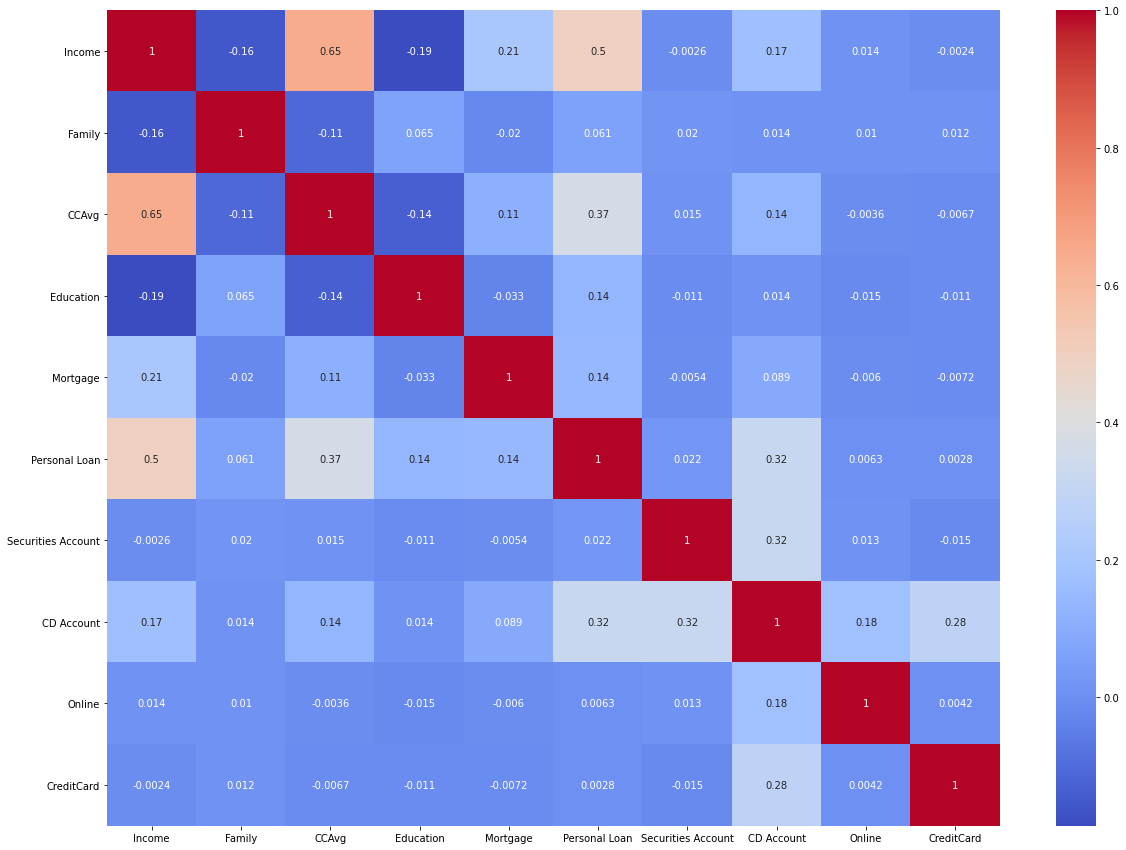

In [ ]:
fig, ax= p.subplots(figsize=(20,15))
sns.heatmap(data1.corr(), cmap='coolwarm',annot=True, )

**Step 4:** Applying necessary transformations to the feature variables

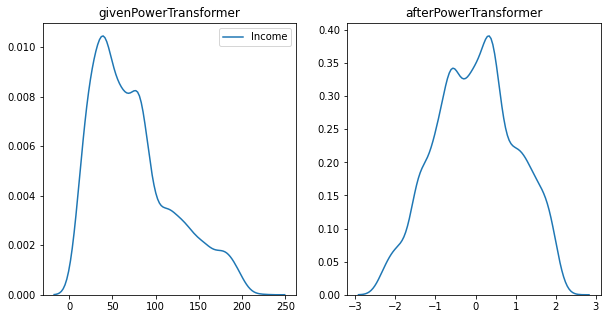

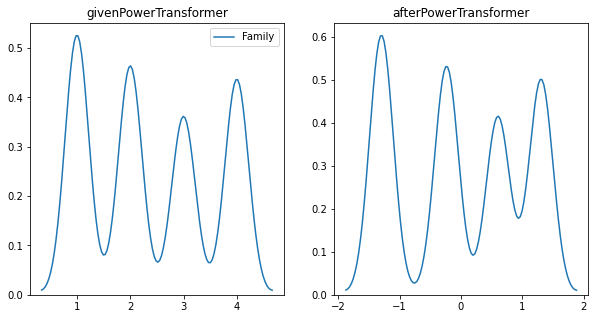

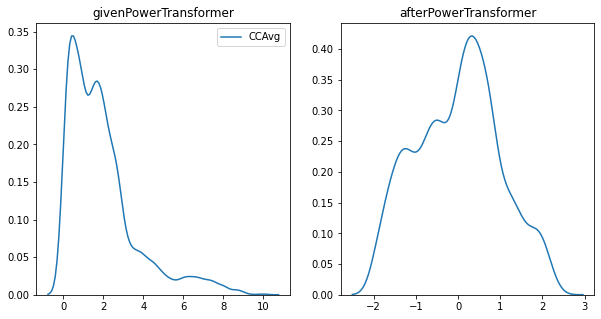

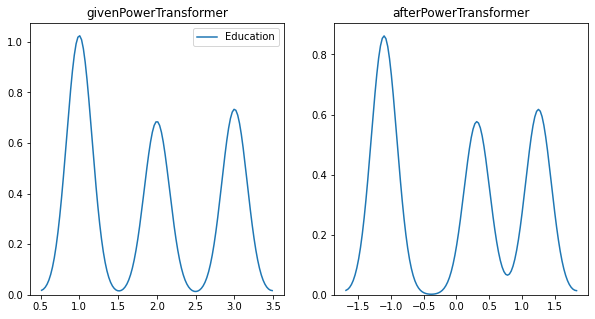

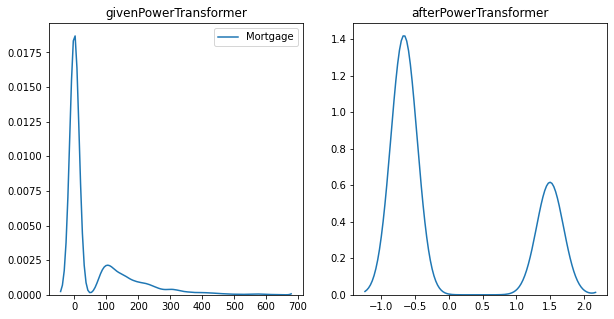

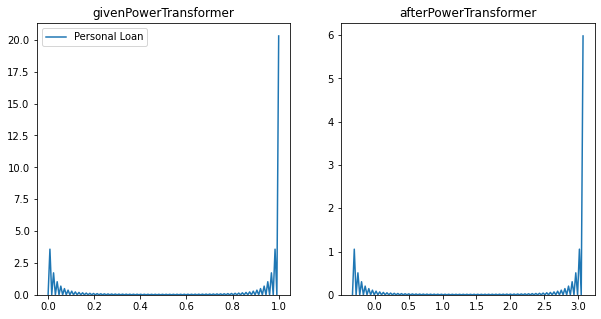

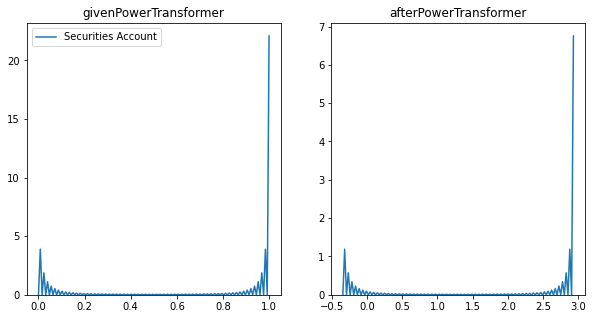

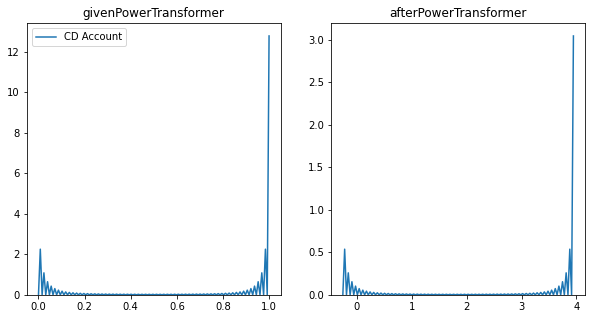

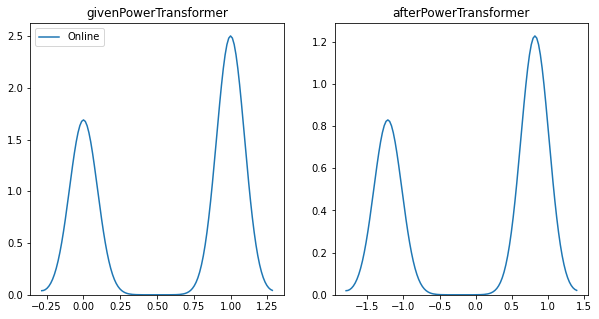

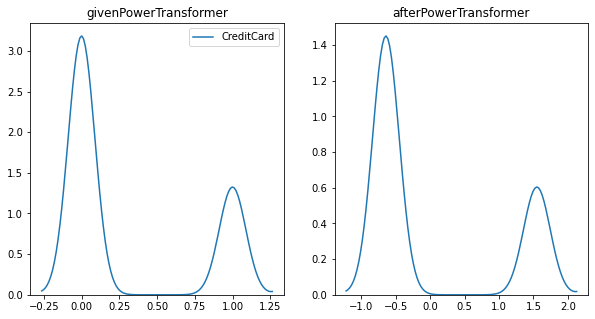

In [10]:
from sklearn.preprocessing import PowerTransformer

def graph(d,v,y):
  plt.figure(figsize=(10,5))
  plt.subplot(121)
  sns.kdeplot(d[v])
  plt.title('given'+str(y).split('(')[0])

  plt.subplot(122)
  t=y.fit_transform(d[[v]]).flatten()
  sns.kdeplot(t)
  plt.title('after'+str(y).split('(')[0])
for c in data1.columns :
  graph(data1,c,PowerTransformer())

**Step 5:**Normalising the data and spliting the data into training and test set in the ratio of 70:30 respectively

In [9]:
data2=data1.drop(['Personal Loan'],axis=1)

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data2,data1['Personal Loan'], test_size=0.30, random_state=0, stratify = data1['Personal Loan'])
x_train.describe()
x=data2
y=data1['Personal Loan']


**Step 6:** Using the Logistic Regression model to predict the likelihood of a customer buying personal loans

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
mod = LogisticRegression(solver='liblinear', random_state=0)
mod.fit(x,y)
mod.predict(x)
mod.predict_proba(x)
mod.score(x, y)


0.952

In [15]:
print(classification_report(y, mod.predict(x)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4520
           1       0.84      0.61      0.71       480

    accuracy                           0.95      5000
   macro avg       0.90      0.80      0.84      5000
weighted avg       0.95      0.95      0.95      5000



**Step 7:** Printing all the metrics related for evaluating the model performance

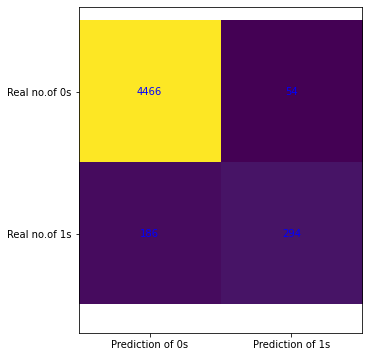

In [17]:
conmat = confusion_matrix(y, mod.predict(x))

fg, ver = plt.subplots(figsize=(13,6))
ver.imshow(conmat)
ver.grid(False)
ver.xaxis.set(ticks=(0, 1), ticklabels=('Prediction of 0s', 'Prediction of 1s'))
ver.yaxis.set(ticks=(0, 1), ticklabels=('Real no.of 0s', 'Real no.of 1s'))
ver.set_ylim(1.7, -0.6)
for q in range(2):
    for w in range(2):
        ver.text(w, q, conmat[q, w], ha='center', va='center', color='blue')
plt.show()

In [18]:
import sklearn.metrics as met
ver2=mod.predict(x_test)
print("Accuracy=",met.accuracy_score(y_test, ver2))
print("Precision=",met.precision_score(y_test,ver2))
print("Recall=",met.recall_score(y_test,ver2))
print("F1_score=",met.f1_score(y_test,ver2))
print("Roc_auc_score=",met.roc_auc_score(y_test,ver2))

Accuracy= 0.952
Precision= 0.8529411764705882
Recall= 0.6041666666666666
F1_score= 0.7073170731707317
Roc_auc_score= 0.7965523598820058


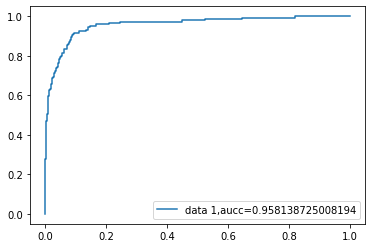

In [19]:
ver3 = mod.predict_proba(x_test)[::,1]
fpr1, tpr1, _ = met.roc_curve(y_test,ver3)
aucc = met.roc_auc_score(y_test,ver3)
plt.plot(fpr1,tpr1,label="data 1,aucc="+str(aucc))
plt.legend(loc=4)
plt.show()

**Step 8:** Build various other classification algorithms and compare their performance

KNN & Naive Bayes


In [29]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=7)
kn.fit(x_train, y_train)
ver3 = kn.predict(x_test)
print("Accuracy:",met.accuracy_score(y_test, ver3))
print("Precision:",met.precision_score(y_test,ver3))
print("Recall:",met.recall_score(y_test,ver3))
print("F1_score:",met.f1_score(y_test,ver3))
print("Roc_auc_score:",met.roc_auc_score(y_test,ver3))

Accuracy: 0.9346666666666666
Precision: 0.7674418604651163
Recall: 0.4583333333333333
F1_score: 0.5739130434782609
Roc_auc_score: 0.7217920353982301


In [30]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(x_train, y_train)
ver4=bayes.predict(x_test)
print("Accuracy:",met.accuracy_score(y_test, ver4))
print("Precision:",met.precision_score(y_test,ver4))
print("Recall:",met.recall_score(y_test,ver4))
print("F1_score:",met.f1_score(y_test,ver4))
print("Roc_auc_score:",met.roc_auc_score(y_test,ver4))

Accuracy: 0.8866666666666667
Precision: 0.43434343434343436
Recall: 0.5972222222222222
F1_score: 0.5029239766081872
Roc_auc_score: 0.7573131760078663


**Conculsion**

From the analysis done i can conclude that the logistic regression is the best algorithm because it has an accuracy of 0.95